In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import cm
import re

In [4]:
import os,sys
sys.path.append(os.path.dirname(os.path.abspath('./')))
import utils

/home/wergillius/Project/UTR_VAE


In [5]:
from models import log_and_save
from importlib import reload

In [12]:
reload(log_and_save)

<module 'models.log_and_save' from '/home/wergillius/Project/UTR_VAE/models/log_and_save.py'>

## test the Log_parser

In [13]:
reload(log_and_save)

<module 'models.log_and_save' from '/home/wergillius/Project/UTR_VAE/models/log_and_save.py'>

<font color='navy' size=5>**CALL the ploting func**</font>

%load -s plot_a_exp_set /home/wergillius/Project/UTR_VAE/models/log_and_save.py

In [8]:
# %load -s plot_a_exp_set /home/wergillius/Project/UTR_VAE/models/log_and_save.py
def plot_a_exp_set(log_list,log_name_ls,dataset='val',fig=None,layout=None,check_time=10,start_from=0,**kwargs):
    
    fig = plt.figure(figsize=(20,5)) if fig is None else fig

    n = len(log_list[0].__getattribute__(dataset+"_metric"))  # val or train
    if layout is None:
        axs = fig.subplots(1,n);
    else:
        row,column = layout 
        axs = fig.subplots(row,column)
    
    for i,metric in enumerate(log_list[0].__getattribute__(dataset+"_metric")):
        # layout 
        
        if layout is None:
            ax = axs[i]  
        else:
            ax = axs[i//column,i%column]
        for st,log in enumerate(log_list):
            DF = log.__getattribute__(dataset+"_verbose_DF")
            X = np.arange(DF.shape[0])*check_time if dataset == 'val' else np.arange(DF.shape[0])/6
            ax.plot(X[start_from:],DF[metric].values[start_from:],label=log_name_ls[st],**kwargs)
            ax.set_title(" ".join([dataset.capitalize(),metric]))
        ax.legend()


# RNN

## EXP set 1

- setting 2
- setting 3
- setting 4

In [473]:
st2_path="/home/wergillius/Project/UTR_VAE/log/LSTM_AE/setting2_AE/setting2_test.log"
st3_path="/home/wergillius/Project/UTR_VAE/log/LSTM_AE/setting3_AE/setting3_test.log"
st4_path="/home/wergillius/Project/UTR_VAE/log/LSTM_AE/setting4_AE/setting4_test.log"
# read
st2=log_and_save.Log_parser(st2_path)
st3=log_and_save.Log_parser(st3_path)
st4=log_and_save.Log_parser(st4_path)

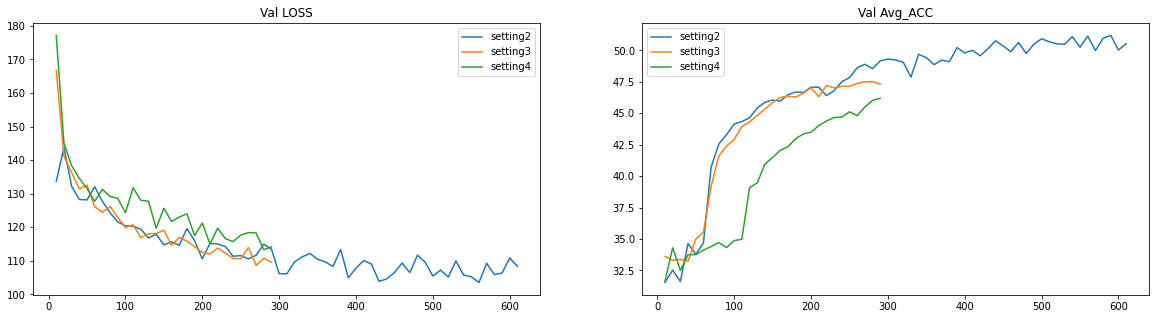

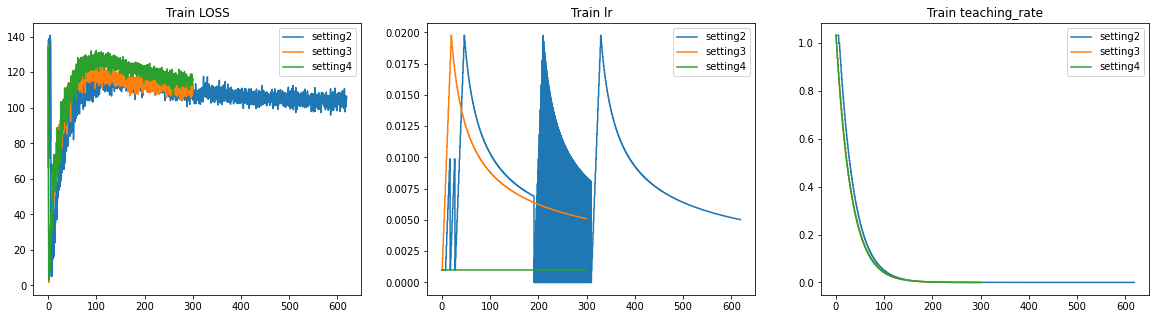

In [797]:
log_list=[st2,st3,st4]
log_name_ls = ["setting2","setting3","setting4"]

plot_a_exp_set(log_list,log_name_ls)
plot_a_exp_set(log_list,log_name_ls,'train')

## set2 and set 3

## EXP set 2

- setting 5
- setting 6
- setting 7

In [29]:
st5_path="/home/wergillius/Project/UTR_VAE/log/LSTM_AE/setting5_AE/enlarge_hidden.log"
st6_path="/home/wergillius/Project/UTR_VAE/log/LSTM_AE/setting6_AE/enlarge_num_layer.log"
st7_path="/home/wergillius/Project/UTR_VAE/log/LSTM_AE/setting7_AE/enlarge_hidden_layer.log"
# read
st5=log_and_save.Log_parser(st5_path)
st6=log_and_save.Log_parser(st6_path)
st7=log_and_save.Log_parser(st7_path)

```python
log_list=[st2,st5,st6,st7]
log_name_ls = ["baseline","hidden_64","#layer_4","combine"]

plot_a_exp_set(log_list,log_name_ls,fig=plt.figure(figsize=(16,6)))

plot_a_exp_set(log_list,log_name_ls,'train',alpha=0.6)```

## EXP set 3

- setting 5_2
- setting 6_2
- setting 7_2

In [498]:
st5_path2="/home/wergillius/Project/UTR_VAE/log/LSTM_AE/setting5_AE/enlarge_hiddento128.log"
st6_path2="/home/wergillius/Project/UTR_VAE/log/LSTM_AE/setting6_AE/enlarge_num_layer3.log"
st7_path2="/home/wergillius/Project/UTR_VAE/log/LSTM_AE/setting7_AE/enlarge_hidden128_layer3.log"
# read
st5_2=log_and_save.Log_parser(st5_path2)
st6_2=log_and_save.Log_parser(st6_path2)
st7_2=log_and_save.Log_parser(st7_path2)

```python
log_list=[st2,st5_2,st6_2,st7_2]
log_name_ls = ["baseline","hidden_128","#layer_3","combine:128&3"]

plot_a_exp_set(log_list,log_name_ls)

plot_a_exp_set(log_list,log_name_ls,'train',alpha=0.6)
```

## 2 & 3 

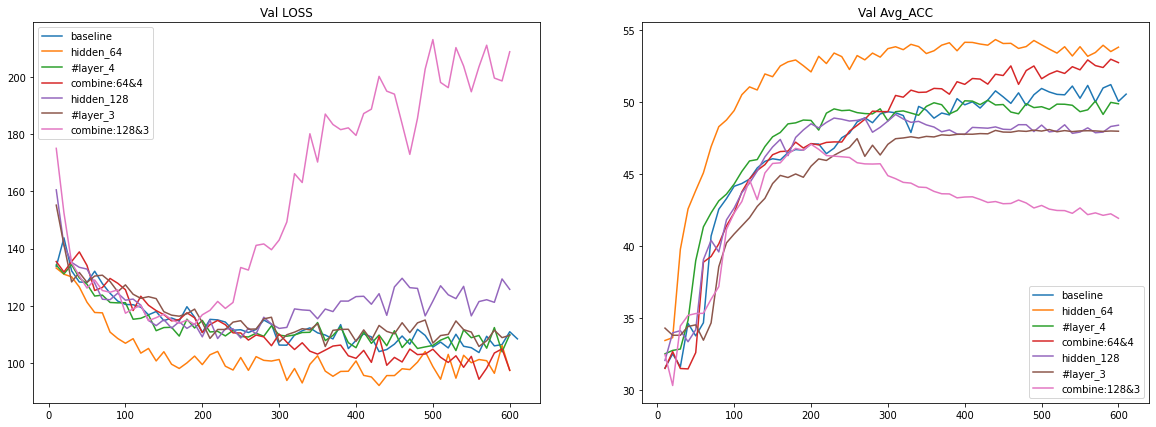

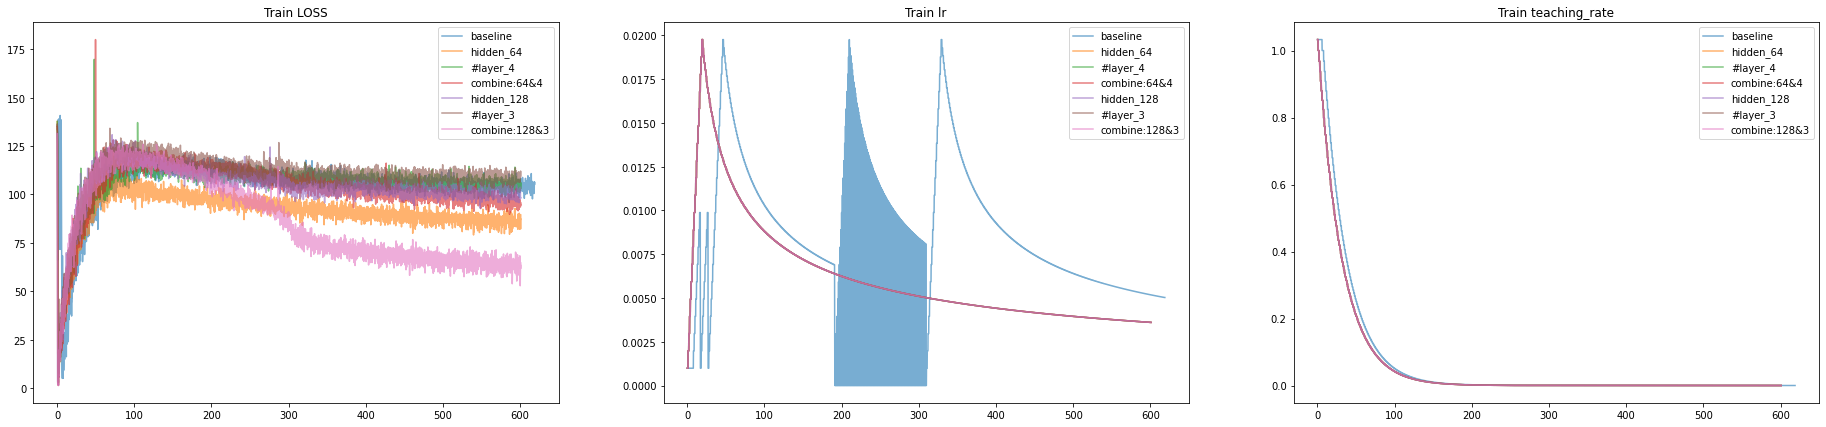

In [947]:
log_list=[st2,st5,st6,st7]+[st5_2,st6_2,st7_2]
log_name_ls = ["baseline","hidden_64","#layer_4","combine:64&4"]+ ["hidden_128","#layer_3","combine:128&3"]

fig = plt.figure(figsize=(20,7))
plot_a_exp_set(log_list,log_name_ls,fig=fig)

fig = plt.figure(figsize=(32,7))
plot_a_exp_set(log_list,log_name_ls,'train',fig=fig,alpha=0.6)

In [572]:
def teacher_decay(epoch,k,b,c=0.1):
    
     y = np.exp(-1*k*epoch + b)
     
     return y if y >c else c

In [663]:
epoch = range(1,900)

In [672]:
y = [teacher_decay(x,4e-3,0,0.1) for x in epoch]

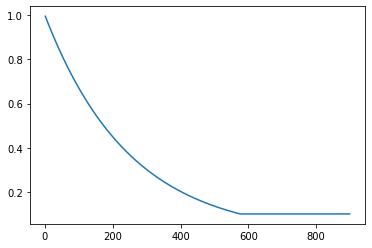

In [673]:
plt.plot(epoch,y)

## EXP set 4

- regularization . compare with setting 7
- fixed teaching

In [30]:
st8_path = "/home/wergillius/Project/UTR_VAE/log/LSTM_AE/setting8_AE/7AE_with_L2_re_run.log"
st9_path = "/home/wergillius/Project/UTR_VAE/log/LSTM_AE/setting9_AE/fixed_teaching_vs5.log"
st8 = log_and_save.Log_parser(st8_path)
st9 = log_and_save.Log_parser(st9_path)

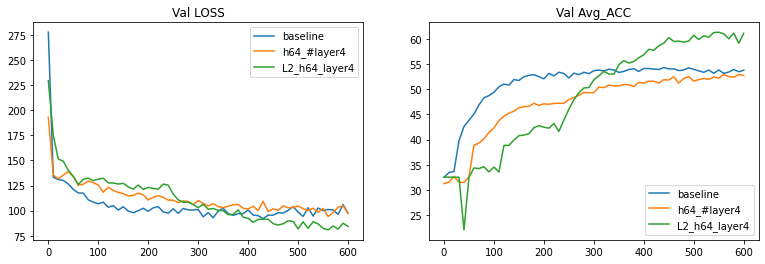

In [39]:
log_list=[st5,st7,st8]#,st9]
log_name = ["baseline","h64_#layer4","L2_h64_layer4"]#,"fixed_teaching"]
plot_a_exp_set(log_list,log_name,fig=plt.figure(figsize=(13,4)))

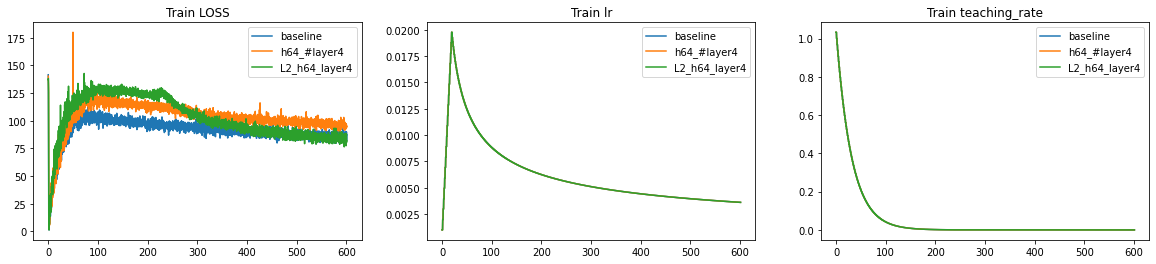

In [36]:
plot_a_exp_set(log_list,log_name,'train',fig=plt.figure(figsize=(20,4)))

## Exp set 5 & set 8
- long teaching
- new optim 
- fc output

##### the 1st run

In [798]:
st10_path = "/home/wergillius/Project/UTR_VAE/log/LSTM_AE/setting10_AE/1st_training/hidden64_long_teacher_forcin_1st.log"
st10_small_path = "/home/wergillius/Project/UTR_VAE/log/LSTM_AE/setting10_AE/1st_training/hidden64_long_teacher_forcing_batch10_1st.log"

#### running ....

In [49]:
st10_path = "/home/wergillius/Project/UTR_VAE/log/LSTM_AE/setting10_AE/hidden64_long_teacher_forcing.log"
st10_small_path = "/home/wergillius/Project/UTR_VAE/log/LSTM_AE/setting10_AE/hidden64_long_teacher_forcing_batch10.log"
st10_ultra_long_path = "/home/wergillius/Project/UTR_VAE/log/LSTM_AE/setting10_AE/hidden64_b10_ultralong.log"
st10_lt_NO_path="/home/wergillius/Project/UTR_VAE/log/LSTM_AE/setting10_AE/st10_lT_b10_NewOptim.log"
st10_NwO_fc_path = "/home/wergillius/Project/UTR_VAE/log/LSTM_AE/setting10_AE/st10_NwOp_fc.log"

st10 = log_and_save.Log_parser(st10_path)
st10_small = log_and_save.Log_parser(st10_small_path)
st10_ultra = log_and_save.Log_parser(st10_ultra_long_path)
st10_lt_NwOp = log_and_save.Log_parser(st10_lt_NO_path)
st10_NwO_fc = log_and_save.Log_parser(st10_NwO_fc_path)

the lowest lr long_Teaching_small_batch : 	 4.731e-06
the lowest lr NewOptim : 	 0.000115802
the lowest lr NewOptim_fc : 	 0.000115802


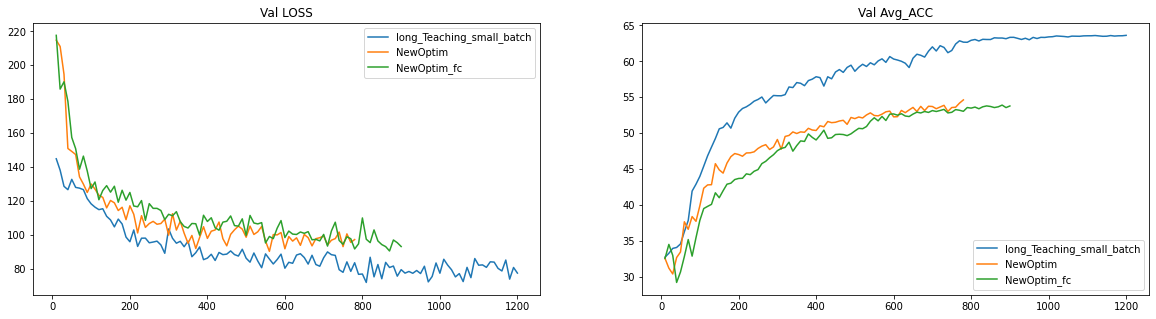

<Figure size 2304x504 with 0 Axes>

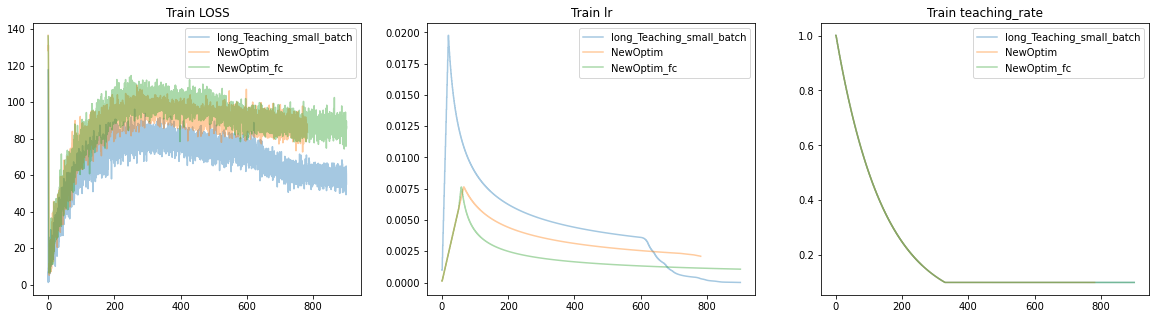

In [93]:
# log_list = [st5,st10,st10_small,st10_lt_NwOp,st10_NwO_fc]
# log_name = ["baseline","long_Teaching","long_Teaching_small_batch","NewOptim","NewOptim_fc"]
log_list = [st10_small,st10_lt_NwOp,st10_NwO_fc]
log_name = ["long_Teaching_small_batch","NewOptim","NewOptim_fc"]

plot_a_exp_set(log_list,log_name)

fig = plt.figure(figsize=(32,7))
plot_a_exp_set(log_list,log_name,'train',alpha=0.4)
for log,name in zip(log_list,log_name):
    print("the lowest lr {} : \t {}".format(name, log.train_verbose_DF.lr.min()))

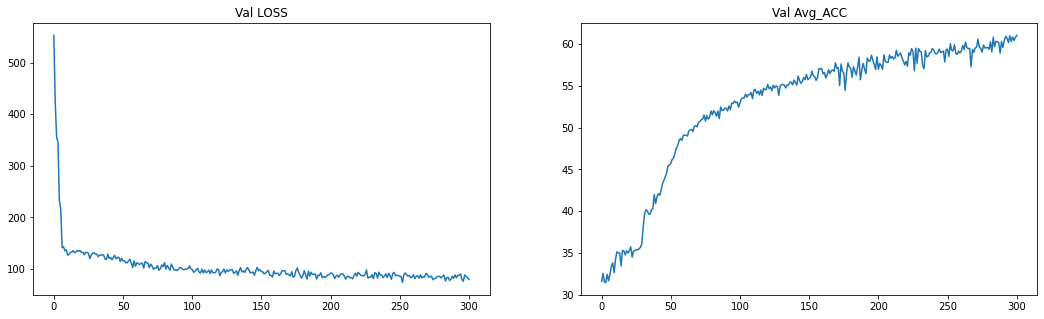

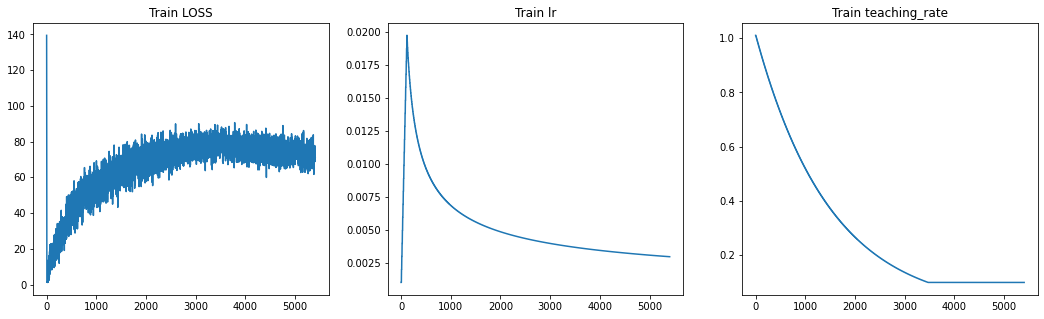

In [51]:
st10_ultra.plot_val_metric(dataset='val')
st10_ultra.plot_val_metric(dataset='train')

## Exp set 6

exploring bi-directional

In [837]:
st11_path2="/home/wergillius/Project/UTR_VAE/log/LSTM_AE/setting11_AE/bi-vs_st10.log"
st11_path="/home/wergillius/Project/UTR_VAE/log/LSTM_AE/setting11_AE/bi-directional_enc.log"

In [838]:
st11 = log_and_save.Log_parser(st11_path)
st11_2 = log_and_save.Log_parser(st11_path2)

In [845]:
st11_2.train_verbose_DF.iloc[200:300,:]

,LOSS,lr,teaching_rate
200,33.387032,0.015158,0.794534
201,40.939182,0.015158,0.794534
202,37.643593,0.015158,0.794534
203,34.516388,0.015158,0.794534
204,26.557459,0.014940,0.788991
...,...,...,...
295,40.534416,0.012500,0.710348
296,40.595242,0.012500,0.710348
297,43.951248,0.012500,0.710348
298,49.836323,0.012500,0.710348


the lowest lr bi_ultra_long : 	 0.0
the lowest lr bi_long : 	 0.0


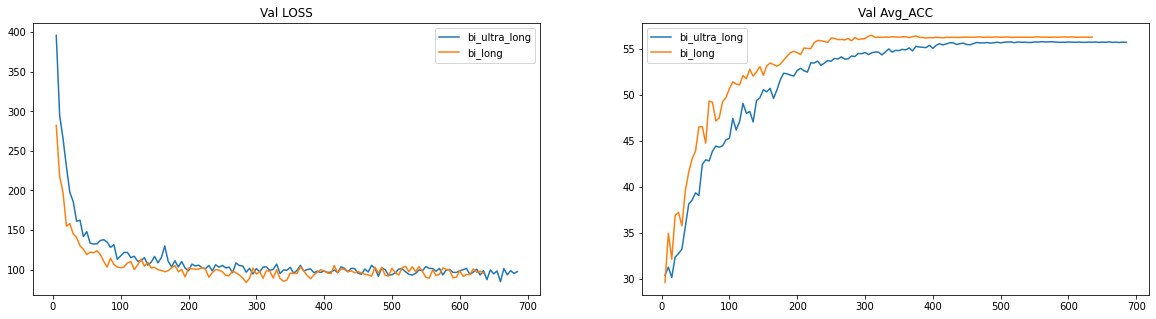

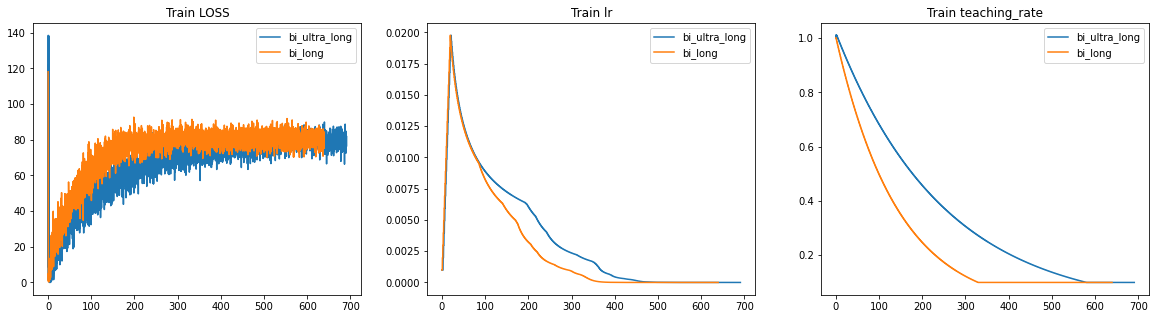

In [927]:
log_list=[st11,st11_2]
log_name = ['bi_ultra_long','bi_long']

plot_a_exp_set(log_list,log_name,check_time=5)
plot_a_exp_set(log_list,log_name,'train')
for log,name in zip(log_list,log_name):
    print("the lowest lr {} : \t {}".format(name, log.train_verbose_DF.lr.min()))

In [932]:
for log,name in zip(log_list,log_name):
    print("the stopping step begins at {} : \t {}".format(name, np.where(log.train_verbose_DF.lr == 0.0)[0].min()))

the stopping step begins at bi_ultra_long : 	 4072
the stopping step begins at bi_long : 	 3192


## EXP set 7

In [53]:
st8_path = "/home/wergillius/Project/UTR_VAE/log/LSTM_AE/setting8_AE/7AE_with_L2_re_run.log"
st8_long_path = "/home/wergillius/Project/UTR_VAE/log/LSTM_AE/setting8_AE/L2_64_4_long.log"
st8_ul_path = "/home/wergillius/Project/UTR_VAE/log/LSTM_AE/setting8_AE/L2_64_4_ultra_long.log"

st8_1st = log_and_save.Log_parser(st8_path)
st8_long = log_and_save.Log_parser(st8_long_path)
st8_ul = log_and_save.Log_parser(st8_ul_path)

the lowest lr L2 : 	 0.000988212
the lowest lr L2_long : 	 0.000105524
the lowest lr L2_ultra_long : 	 2.1e-07


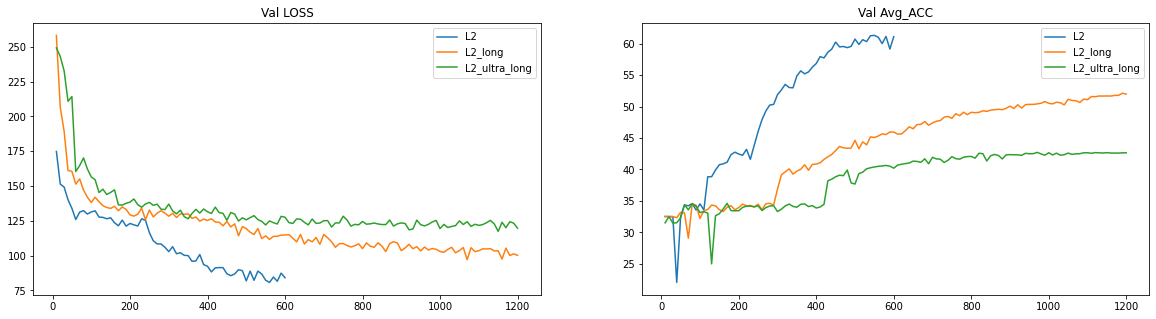

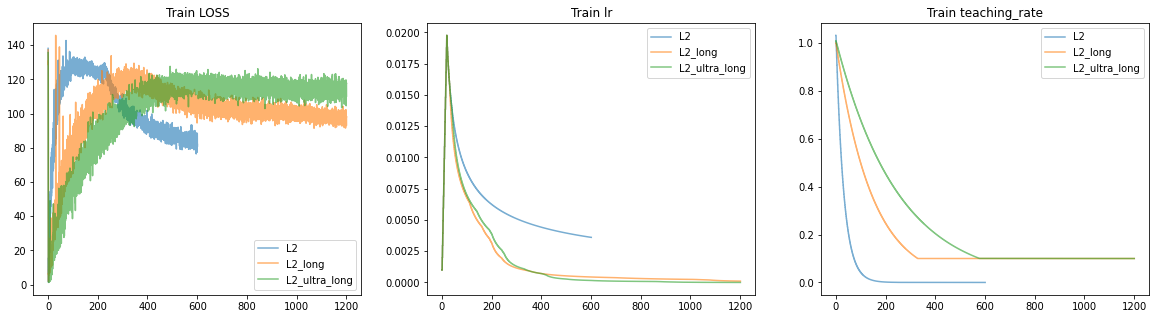

In [89]:
log_list = [st8_1st,st8_long,st8_ul] 
log_name = ["L2","L2_long","L2_ultra_long"]
plot_a_exp_set(log_list,log_name)
plot_a_exp_set(log_list,log_name,dataset='train',alpha=0.6)

for log,name in zip(log_list,log_name):
    print("the lowest lr {} : \t {}".format(name, log.train_verbose_DF.lr.min()))

lowest lr: 0.000066


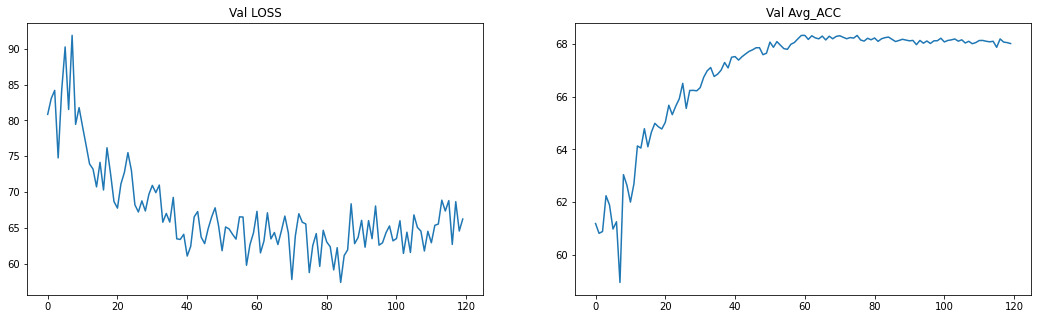

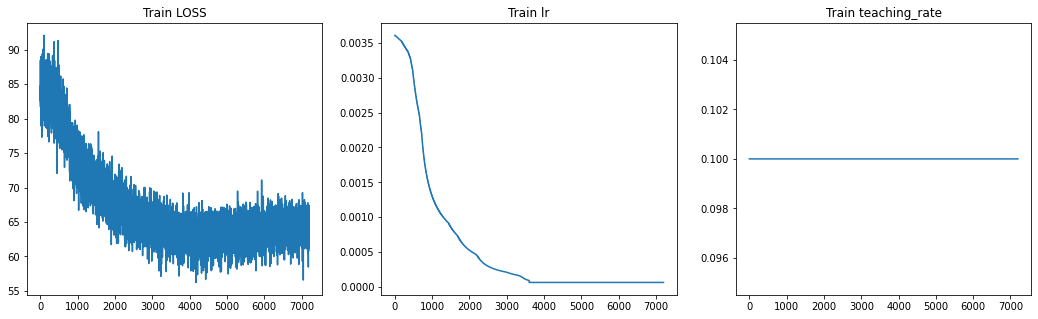

In [106]:
st8_path = "/home/wergillius/Project/UTR_VAE/log/LSTM_AE/setting8_AE/7AE_with_L2.log"
st8 = log_and_save.Log_parser(st8_path)
st8.plot_val_metric()
st8.plot_val_metric(dataset='train')
print("lowest lr: %f"%st8.train_verbose_DF.lr.min())

## test optimizer

<ipython-input-40-cf19f5c659ef>:1: RuntimeWarning: divide by zero encountered in power
  y =  np.power(np.arange(600), -0.5);


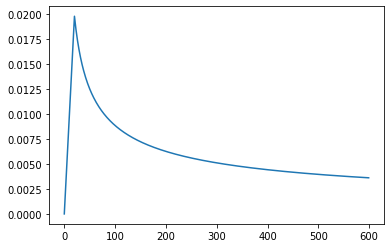

In [40]:
y =  np.power(np.arange(600), -0.5);
y2 = np.power(20, -1.5) * np.arange(600)

Y=np.concatenate([y.reshape(-1,1),y2.reshape(-1,1)],axis=1)

Y_=np.min(Y,axis=1)*np.power(128,-0.5)

plt.plot(Y_);

In [76]:
(1/(0.000094/np.power(128,-0.5)))**2

884167.0439112723

In [77]:
900000

900000

In [101]:
np.power(307200*4, -0.5)*np.power(128,-0.5)

7.973599423122325e-05

In [102]:
256*4

1024

In [97]:
256*1200

307200

# CNN model

## CNN origin and CNN mask 

In [48]:
st1_mask_path = "/home/wergillius/Project/UTR_VAE/log/Conv_AE_mask/setting1/CNN_st1_mask.log"
st1_path = "/home/wergillius/Project/UTR_VAE/log/Conv_AE/setting1/CNN_first_test.log"

In [49]:
st1 = log_and_save.Log_parser(st1_path)
st1_mask = log_and_save.Log_parser(st1_mask_path)

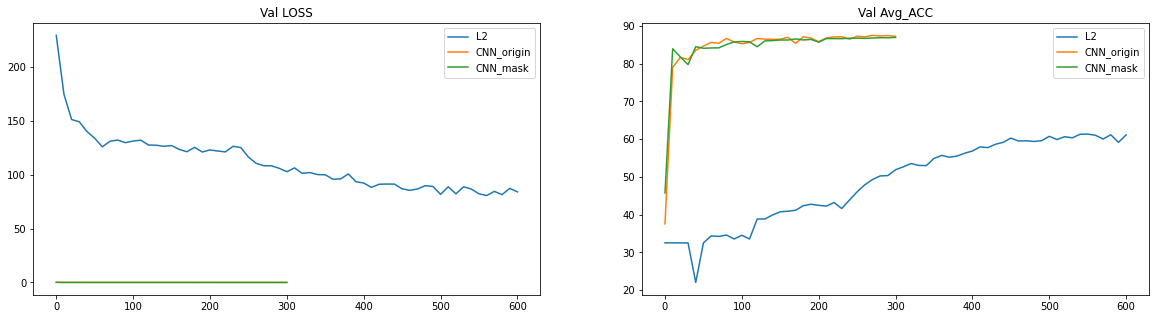

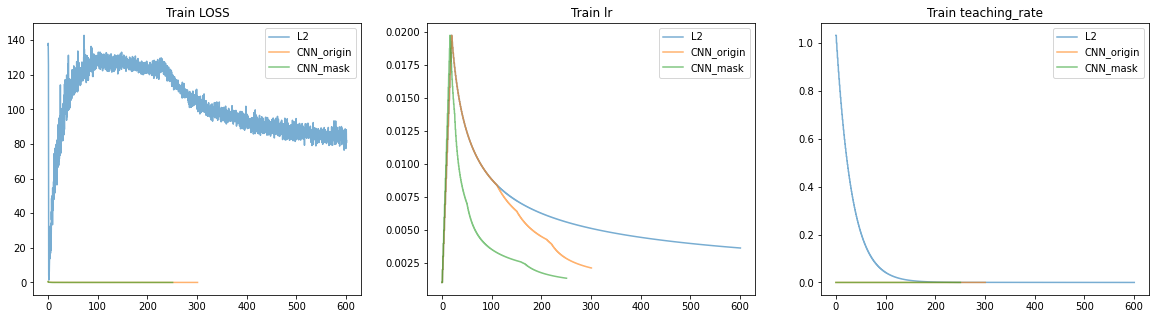

In [54]:
log_list = [st8_1st,st1,st1_mask]
log_name = ["L2","CNN_origin","CNN_mask"]
plot_a_exp_set(log_list,log_name)
plot_a_exp_set(log_list,log_name,dataset='train',alpha=0.6)

## CNN mix

### EXP SET 1 : different dataset and activation function

In [32]:
reload(log_and_save)

<module 'models.log_and_save' from '/home/wergillius/Project/UTR_VAE/models/log_and_save.py'>

In [42]:
diliation_path="/home/wergillius/Project/UTR_VAE/log/Conv_AE_mix/setting3/test_diliation.log"
diliation = log_and_save.Log_parser(diliation_path)

mix_relu_path="/home/wergillius/Project/UTR_VAE/log/Conv_AE_mix/setting2/RELU.log"
mix_relu = log_and_save.Log_parser(mix_relu_path)

mix_path="/home/wergillius/Project/UTR_VAE/log/Conv_AE_mix/setting1/CNN_mix_data.log"
mix = log_and_save.Log_parser(mix_path)

In [57]:
log_list = [st1,st1_mask,diliation,mix,mix_relu]
log_name = ["CNN_origin","CNN_mask","diliation","Leaky_ReLU","ReLU"]

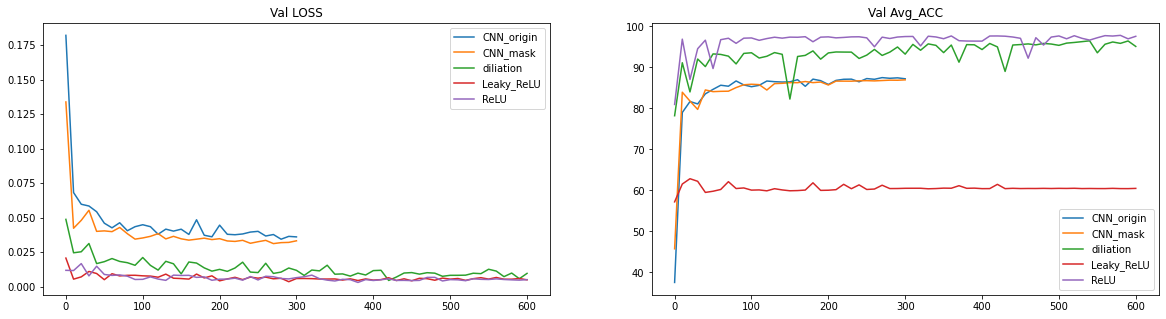

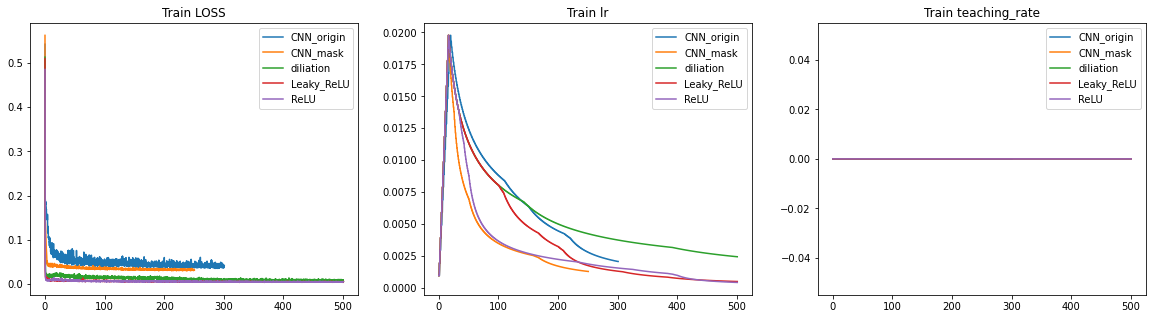

In [58]:
plot_a_exp_set(log_list,log_name)
plot_a_exp_set(log_list,log_name,dataset='train')

## EXP set 2

### small channel

In [43]:
s_channel_path="/home/wergillius/Project/UTR_VAE/log/Conv_AE_mix/setting4/small_channel.log"
s_channel_path2="/home/wergillius/Project/UTR_VAE/log/Conv_AE_mix/setting4/small_channel2.log"
s_channel_path3="/home/wergillius/Project/UTR_VAE/log/Conv_AE_mix/setting4/small_channel3.log"
s_channel_path4="/home/wergillius/Project/UTR_VAE/log/Conv_AE_mix/setting4/small_channel4.log"
s_channel = log_and_save.Log_parser(s_channel_path)
s_channel2 = log_and_save.Log_parser(s_channel_path2)
s_channel3 = log_and_save.Log_parser(s_channel_path3)
s_channel4 = log_and_save.Log_parser(s_channel_path4)

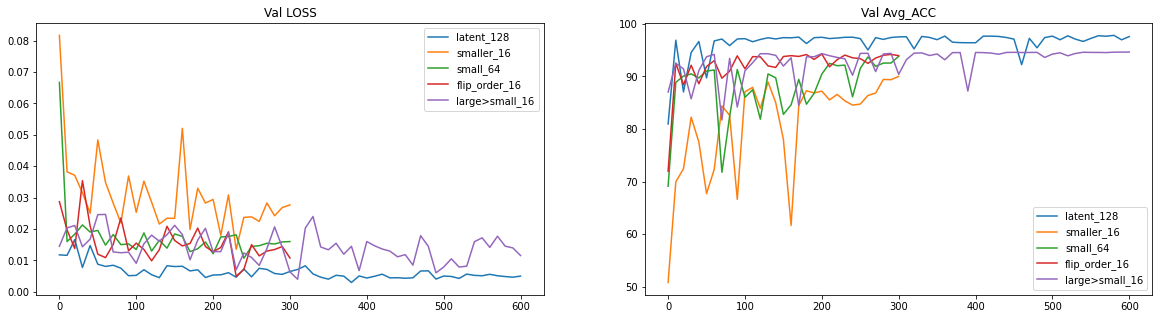

In [44]:
# mix_relu as the baseline
log_list =  [mix_relu,s_channel,s_channel2,s_channel3,s_channel4]
log_name = ['latent_128','smaller_16','small_64','flip_order_16','large>small_16']

plot_a_exp_set(log_list,log_name)

### more depth

In [21]:
deep_16_path = "/home/wergillius/Project/UTR_VAE/log/Conv_AE_mix/setting5/one_more_layer_16.log"
deep_64_path = "/home/wergillius/Project/UTR_VAE/log/Conv_AE_mix/setting5/one_more_layer_64_no_L2.log"
deep_64_L2_path = "/home/wergillius/Project/UTR_VAE/log/Conv_AE_mix/setting5/one_more_layer_64_L2.log"

deep_16 = log_and_save.Log_parser(deep_16_path)
deep_64 = log_and_save.Log_parser(deep_64_path)
deep_64_L2= log_and_save.Log_parser(deep_64_L2_path)

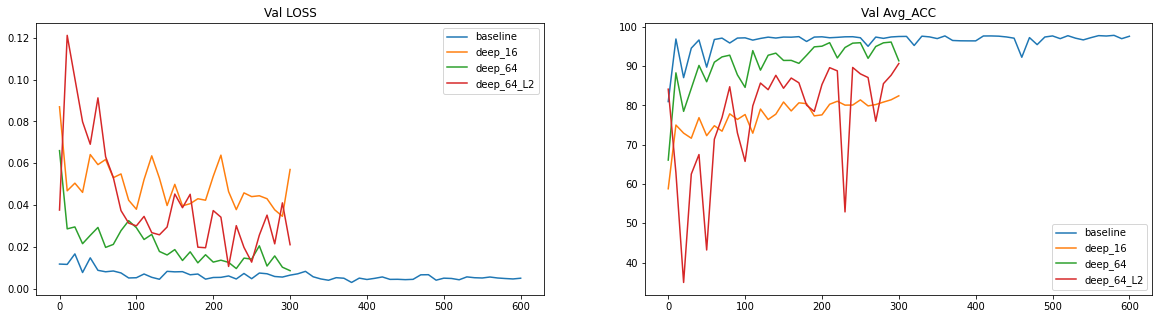

In [22]:
log_list = [mix_relu,deep_16,deep_64,deep_64_L2]
log_name = ["baseline",'deep_16','deep_64','deep_64_L2']
plot_a_exp_set(log_list,log_name)

## EXP set 3: kernel size

In [45]:
set_dir = "/home/wergillius/Project/UTR_VAE/log/Conv_AE_mix/setting6"
set_file_ls = [os.path.join(set_dir,file) for file in os.listdir(set_dir) if ".log" in file]

for file in set_file_ls:
    assert os.path.exists(file)

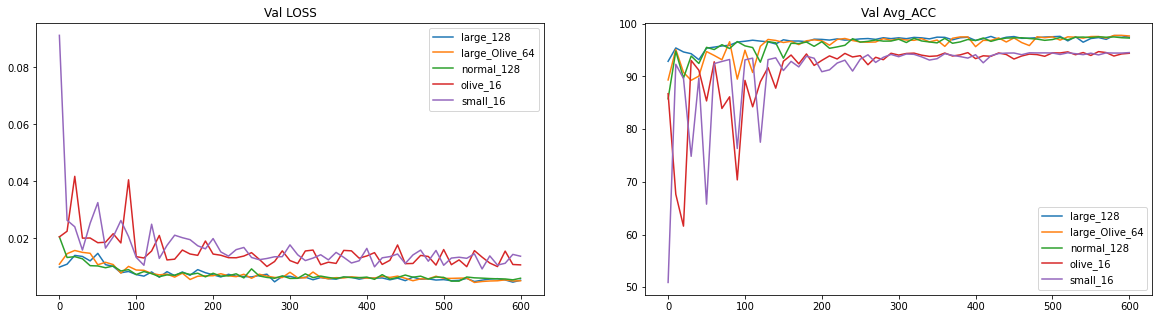

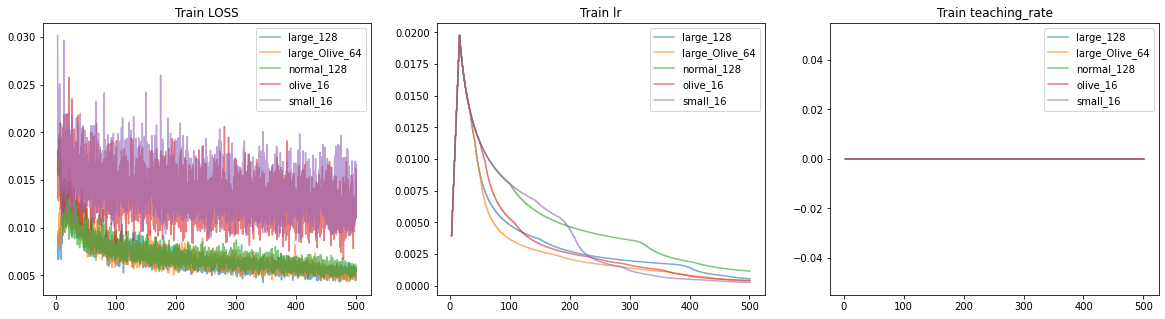

In [46]:
log_list = [log_and_save.Log_parser(log) for log in set_file_ls]
log_name = ['large_128', 'large_Olive_64', 'normal_128', 'olive_16', 'small_16']
st6_large_128,st6_64,st6_n128,st6_oliv_16,st6_small16 = log_list

plot_a_exp_set(log_list,log_name)
plot_a_exp_set(log_list,log_name,dataset='train',start_from=17,alpha=0.6)

## EXP set 2 & EXP set 3

ALL final channel is 16 

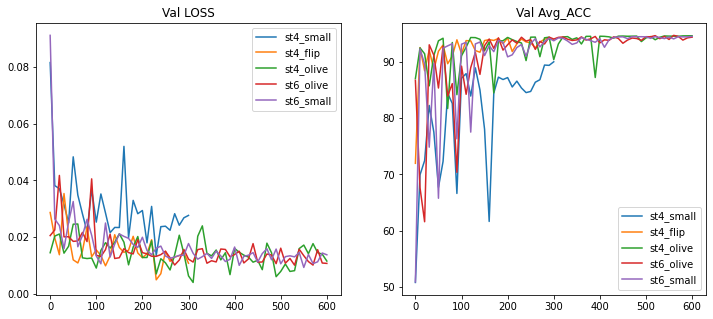

In [47]:
log_list = [s_channel,s_channel3,s_channel4,st6_oliv_16,st6_small16]
log_name = ["st4_small","st4_flip","st4_olive",'st6_olive','st6_small']
plot_a_exp_set(log_list,log_name,fig=plt.figure(figsize=(12,5)))

# CNN VAE

In [36]:
baseline_path = "/home/wergillius/Project/UTR_VAE/log/Conv_VAE_mix/setting1/baseline.log"
M_N_0_path = "/home/wergillius/Project/UTR_VAE/log/Conv_VAE_mix/setting2/M_N_0.log"
M_N_05_path = "/home/wergillius/Project/UTR_VAE/log/Conv_VAE_mix/setting2/M_N_0.5.log"
M_N_10_path = "/home/wergillius/Project/UTR_VAE/log/Conv_VAE_mix/setting2/M_N_10.log"

In [37]:
baseline = log_and_save.Log_parser(baseline_path,val_split_line=True)
M_N_0  = log_and_save.Log_parser(M_N_0_path)
M_N_05 = log_and_save.Log_parser(M_N_05_path)
M_N_10 = log_and_save.Log_parser(M_N_10_path,val_split_line=True)

In [133]:
baseline.val_metric

array(['TOTAL', 'KLD', 'MSE', 'M_N', 'Avg_ACC'], dtype='<U7')

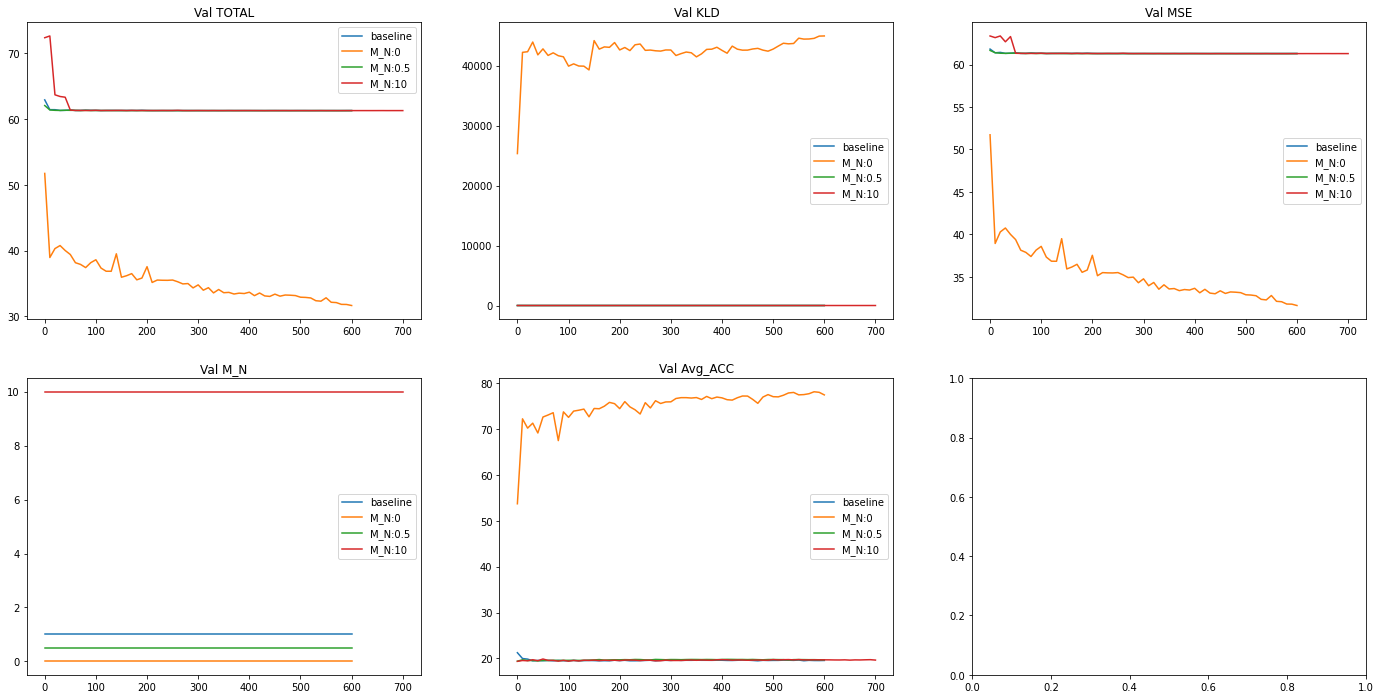

In [158]:
log_list =[baseline,M_N_0,M_N_05 ,M_N_10]
log_name = ['baseline','M_N:0',"M_N:0.5","M_N:10"]

plot_a_exp_set(log_list,log_name,fig=plt.figure(figsize=(24,12)),layout=(2,3))
# plot_a_exp_set(log_list,log_name,dataset="train",fig=plt.figure(figsize=(18,12)),layout=(2,3))

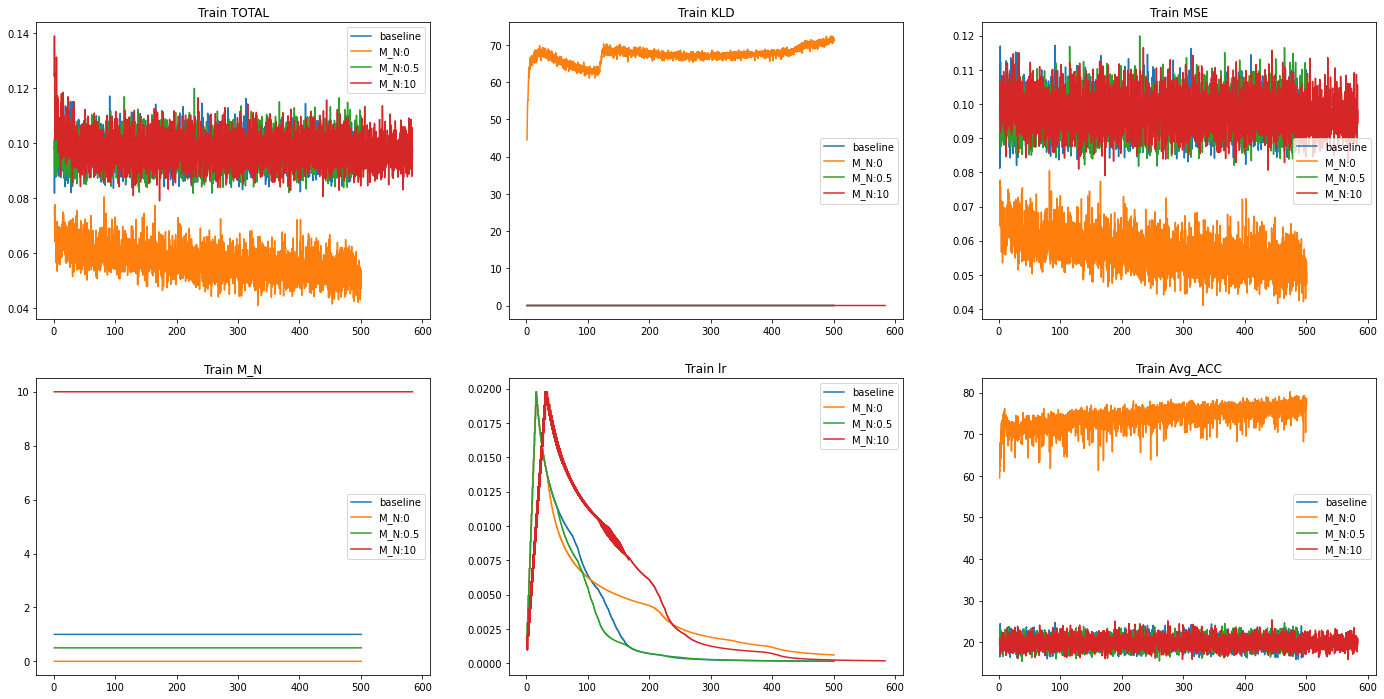

In [165]:
plot_a_exp_set(log_list,log_name,dataset='train',fig=plt.figure(figsize=(24,12)),layout=(2,3),start_from=7)

## Conv VAE EXP set 2 : latent dim

In [48]:
latent_dim_2_path = "/home/wergillius/Project/UTR_VAE/log/Conv_VAE_mix/setting3/latent_dim_2.log"
latent_dim_3_path = "/home/wergillius/Project/UTR_VAE/log/Conv_VAE_mix/setting3/latent_dim_3.log"
latent_dim_64_path = "/home/wergillius/Project/UTR_VAE/log/Conv_VAE_mix/setting3/latent_dim_64.log"
latent_dim_64_L2_path = "/home/wergillius/Project/UTR_VAE/log/Conv_VAE_mix/setting3/latent_dim_64_L2.log"

latent_dim_2 = log_and_save.Log_parser(latent_dim_2_path)
latent_dim_3 = log_and_save.Log_parser(latent_dim_3_path)
latent_dim_64 = log_and_save.Log_parser(latent_dim_64_path)
latent_dim_64_L2 = log_and_save.Log_parser(latent_dim_64_L2_path)

In [49]:
mix_relu.val_metric

array(['LOSS', 'Avg_ACC'], dtype='<U7')

In [50]:
log_list = [latent_dim_2,latent_dim_3,M_N_0,latent_dim_64,latent_dim_64_L2]
log_name = ['latent_dim2','latent_dim3','latent_dim16','latent_dim64','latent_dim64L2']
plot_a_exp_set(log_list,log_name,fig=plt.figure(figsize=(36,6)))

NameError: name 'M_N_0' is not defined

## Conv VAE EXP  set 3 : flip latent 

In [206]:
flip_latent_2_path = "/home/wergillius/Project/UTR_VAE/log/Conv_VAE_mix/setting4/Flip_latent_2.log"
flip_latent_3_path = "/home/wergillius/Project/UTR_VAE/log/Conv_VAE_mix/setting4/Flip_latent_3.log"
flip_latent_64_path = "/home/wergillius/Project/UTR_VAE/log/Conv_VAE_mix/setting4/Flip_latent_64.log"

flip_latent_2 = log_and_save.Log_parser(flip_latent_2_path)
flip_latent_3 = log_and_save.Log_parser(flip_latent_3_path)
flip_latent_64 = log_and_save.Log_parser(flip_latent_64_path)

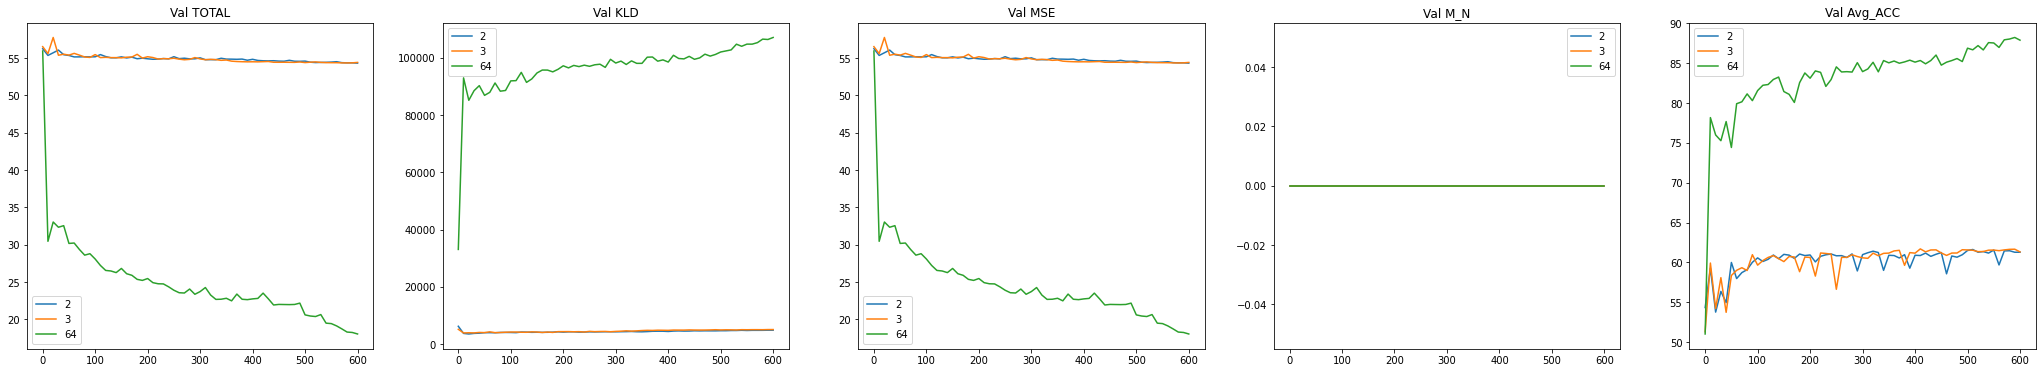

In [209]:
log_list = [flip_latent_2,flip_latent_3,flip_latent_64]
log_name = ['2','3','64']
plot_a_exp_set(log_list,log_name,fig=plt.figure(figsize=(36,6)))

# Conv VAE Asigma

In [31]:
M_N0_path = "/home/wergillius/Project/UTR_VAE/log/Conv_VAE_Asig_mix/Sigmoid/La_dim_64_sigmoid0.log"
M_N0_1_path = "/home/wergillius/Project/UTR_VAE/log/Conv_VAE_Asig_mix/Sigmoid/La_dim_64_sigmoid01.log"
M_N1_path = "/home/wergillius/Project/UTR_VAE/log/Conv_VAE_Asig_mix/Sigmoid/La_dim_64_sigmoid1.log"
M_N5_path = "/home/wergillius/Project/UTR_VAE/log/Conv_VAE_Asig_mix/Sigmoid/La_dim_64_sigmoid5.log"

M_N0 = log_and_save.Log_parser(M_N0_path)
M_N0_1=log_and_save.Log_parser(M_N0_1_path)
M_N1 = log_and_save.Log_parser(M_N1_path)
M_N5 = log_and_save.Log_parser(M_N5_path)

## only activate sigma with sigmoid

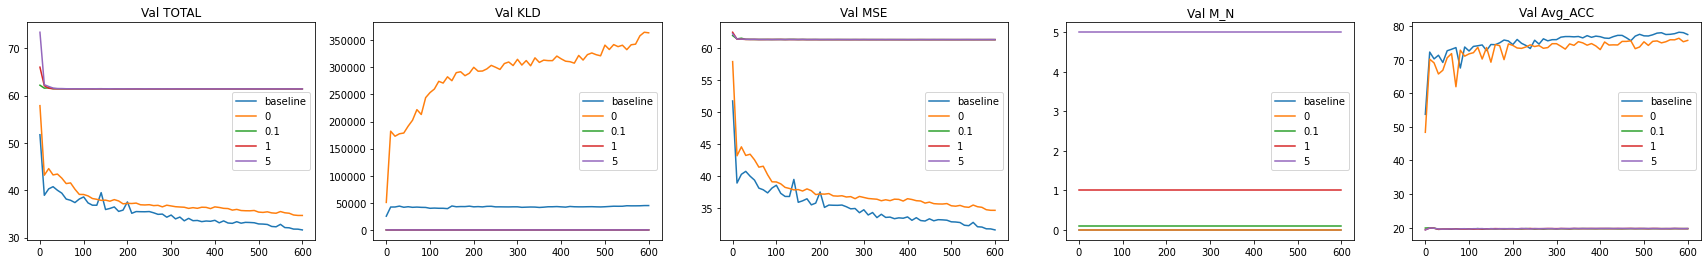

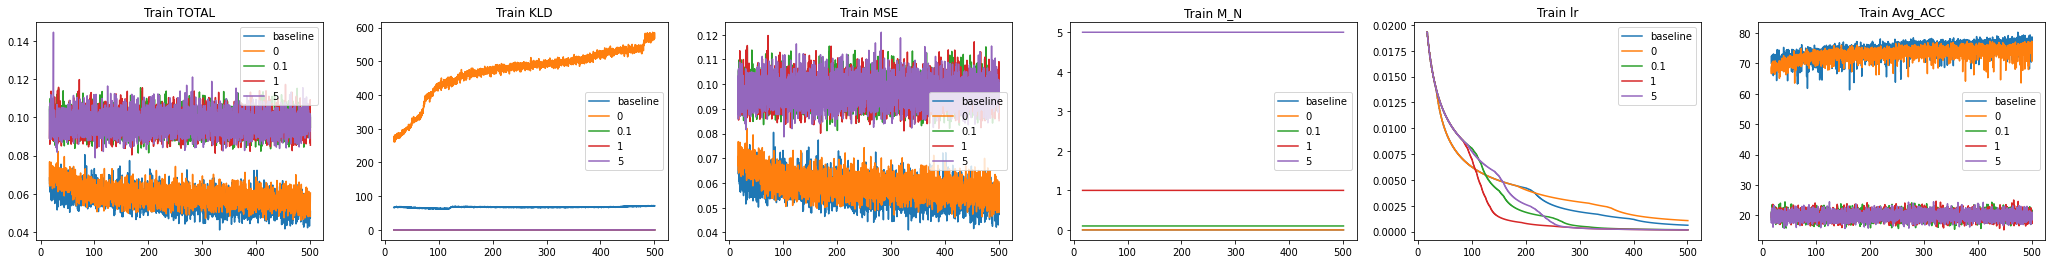

In [47]:
log_list = [M_N_0,M_N0,M_N0_1,M_N1,M_N5]
log_name = ["baseline","0","0.1","1","5"]
plot_a_exp_set(log_list,log_name,fig=plt.figure(figsize=(30,4)))
plot_a_exp_set(log_list,log_name,dataset="train",fig=plt.figure(figsize=(36,4)),start_from=100)

## two activation sigma and mu

In [15]:
two_act_0_path = "/home/wergillius/Project/UTR_VAE/log/Conv_VAE_Asig_mix/Sigmoid_Tanh/La_dim_64_two_act_0.log"
two_act_e_1_path = "/home/wergillius/Project/UTR_VAE/log/Conv_VAE_Asig_mix/Sigmoid_Tanh/La_dim_64_two_act_e-1.log"
two_act_e_2_path = "/home/wergillius/Project/UTR_VAE/log/Conv_VAE_Asig_mix/Sigmoid_Tanh/La_dim_64_two_act_e-2.log"
two_act_e_3_path = "/home/wergillius/Project/UTR_VAE/log/Conv_VAE_Asig_mix/Sigmoid_Tanh/La_dim_64_two_act_e-3.log"
two_act_e_4_path = "/home/wergillius/Project/UTR_VAE/log/Conv_VAE_Asig_mix/Sigmoid_Tanh/La_dim_64_two_act_e-4.log"
two_act_e_6_path = "/home/wergillius/Project/UTR_VAE/log/Conv_VAE_Asig_mix/Sigmoid_Tanh/La_dim_64_two_act_e-6.log"
two_act_e_8_path = "/home/wergillius/Project/UTR_VAE/log/Conv_VAE_Asig_mix/Sigmoid_Tanh/La_dim_64_two_act_e-8.log"

two_act_0   = log_and_save.Log_parser(two_act_0_path)
two_act_e_1 = log_and_save.Log_parser(two_act_e_1_path)
two_act_e_2 = log_and_save.Log_parser(two_act_e_2_path)
two_act_e_3 = log_and_save.Log_parser(two_act_e_3_path)
two_act_e_4 = log_and_save.Log_parser(two_act_e_4_path)
two_act_e_6 = log_and_save.Log_parser(two_act_e_6_path)
two_act_e_8 = log_and_save.Log_parser(two_act_e_8_path)

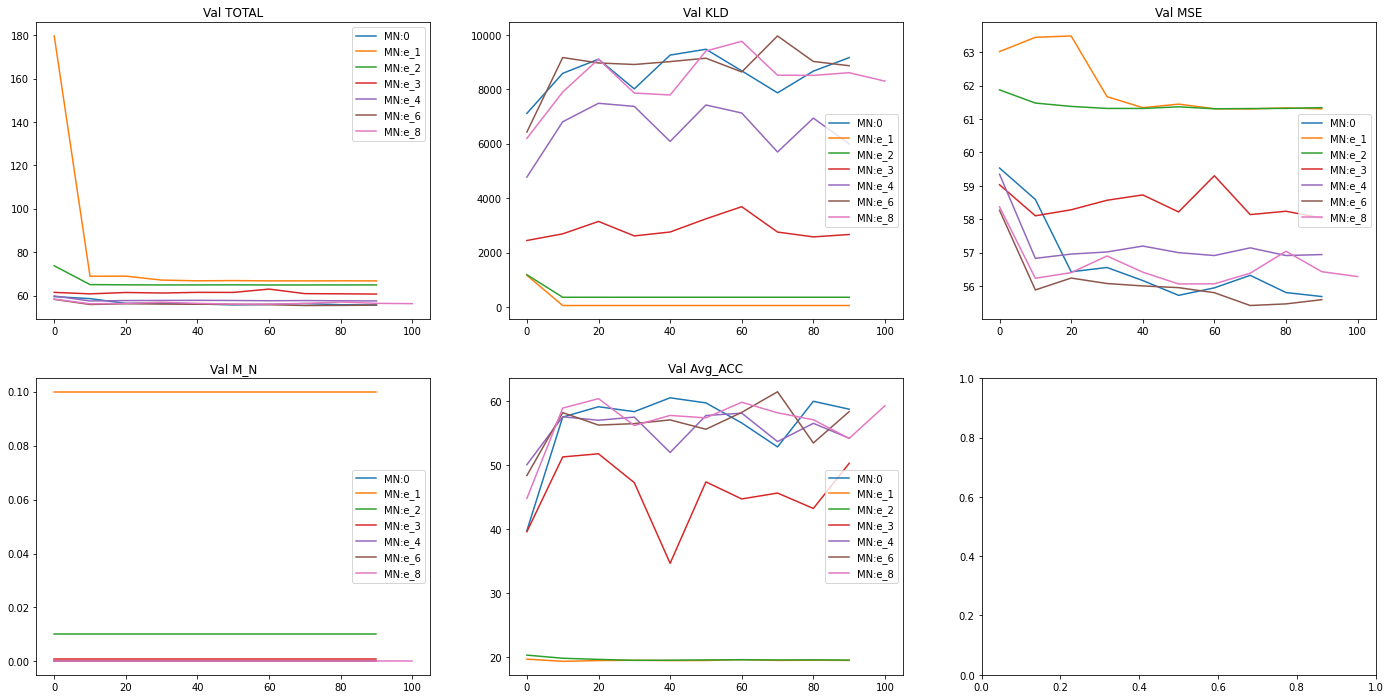

In [52]:
log_list = [two_act_0,two_act_e_1,two_act_e_2,two_act_e_3,two_act_e_4,two_act_e_6,two_act_e_8]
log_name = ["MN:0","MN:e_1","MN:e_2","MN:e_3","MN:e_4","MN:e_6","MN:e_8"]
plot_a_exp_set(log_list,log_name,fig = plt.figure(figsize=(24,12)),layout=(2,3))

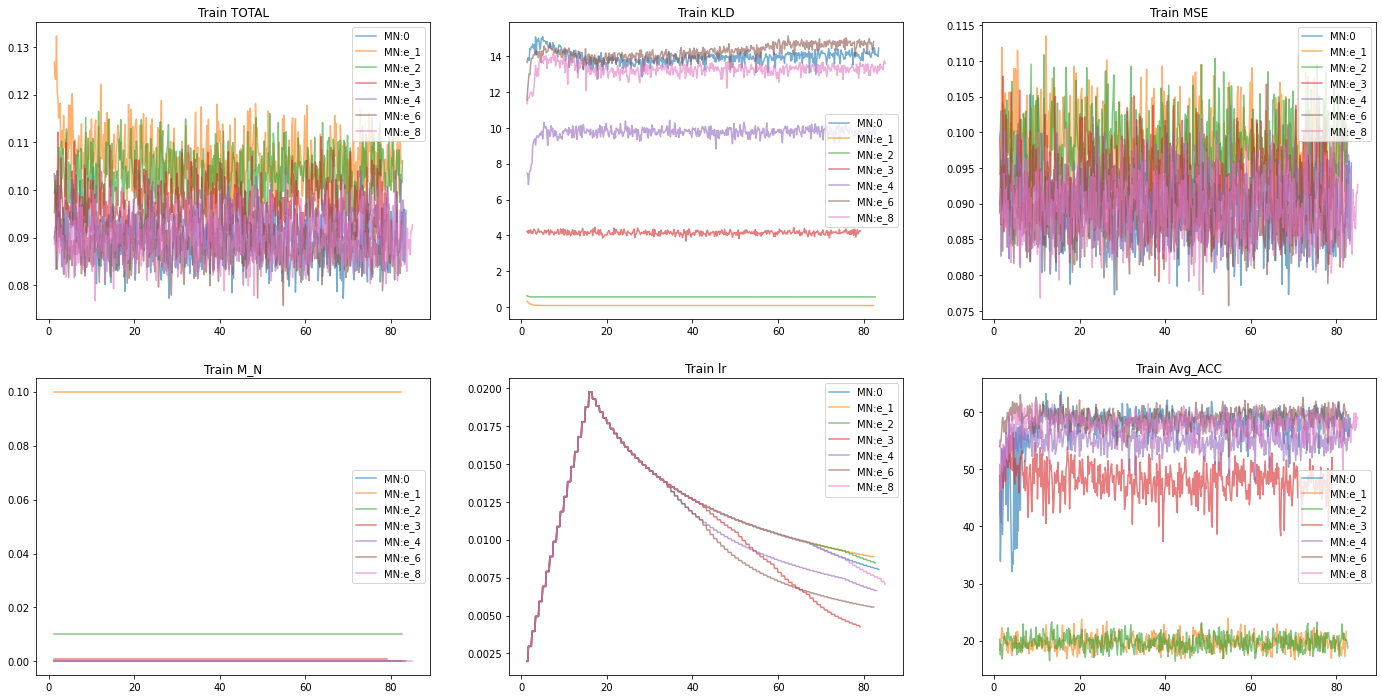

In [57]:
plot_a_exp_set(log_list,log_name,fig = plt.figure(figsize=(24,12)),layout=(2,3),dataset='train',start_from=8,alpha=0.6)